In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [16]:
con = sqlite3.connect('Employees - SQLite.db')
df = pd.read_sql('SELECT * FROM emp', con)

In [17]:
df

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-06-09,2450,NaN,10
7,7788,SCOTT,ANALYST,7566.0,1982-12-09,3000,NaN,20
8,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
9,7844,TURNER,SALESMAN,7698.0,1981-09-08,1500,0.0,30


In [18]:
df = df.drop(['EMPNO', 'COMM', 'DEPTNO', 'MGR'], axis= 1)
df = df.dropna()
df = df.drop_duplicates()

In [19]:
df 

,ENAME,JOB,HIREDATE,SAL
0,SMITH,CLERK,1980-12-17,800
1,ALLEN,SALESMAN,1981-02-20,1600
2,WARD,SALESMAN,1981-02-22,1250
3,JONES,MANAGER,1981-04-02,2975
4,MARTIN,SALESMAN,1981-09-28,1250
5,BLAKE,MANAGER,1981-05-01,2850
6,CLARK,MANAGER,1981-06-09,2450
7,SCOTT,ANALYST,1982-12-09,3000
8,KING,PRESIDENT,1981-11-17,5000
9,TURNER,SALESMAN,1981-09-08,1500


In [20]:
df = df.rename(columns= {'ENAME': 'Name', 'JOB': 'Job', 'HIREDATE': 'Hire_Date', 'SAL': 'Salary'})
df

,Name,Job,Hire_Date,Salary
0,SMITH,CLERK,1980-12-17,800
1,ALLEN,SALESMAN,1981-02-20,1600
2,WARD,SALESMAN,1981-02-22,1250
3,JONES,MANAGER,1981-04-02,2975
4,MARTIN,SALESMAN,1981-09-28,1250
5,BLAKE,MANAGER,1981-05-01,2850
6,CLARK,MANAGER,1981-06-09,2450
7,SCOTT,ANALYST,1982-12-09,3000
8,KING,PRESIDENT,1981-11-17,5000
9,TURNER,SALESMAN,1981-09-08,1500


C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_8664\1196133021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = job_salary.index,


Text(0, 0.5, 'Average Salary')

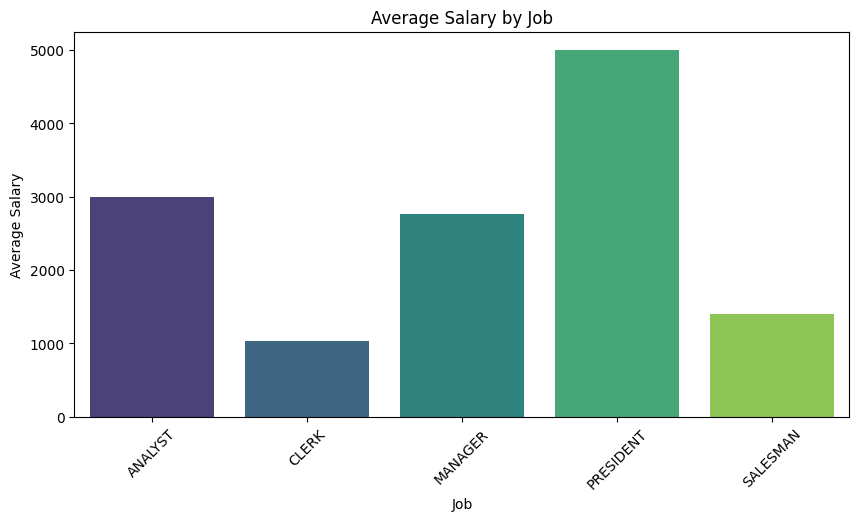

In [24]:
job_salary = df.groupby('Job')['Salary'].mean()

plt.figure(figsize= (10, 5))
sns.barplot(x = job_salary.index,
            y = job_salary.values,
            palette = 'viridis')
plt.xticks(rotation = 45)
plt.title('Average Salary by Job')
plt.xlabel('Job')
plt.ylabel('Average Salary')

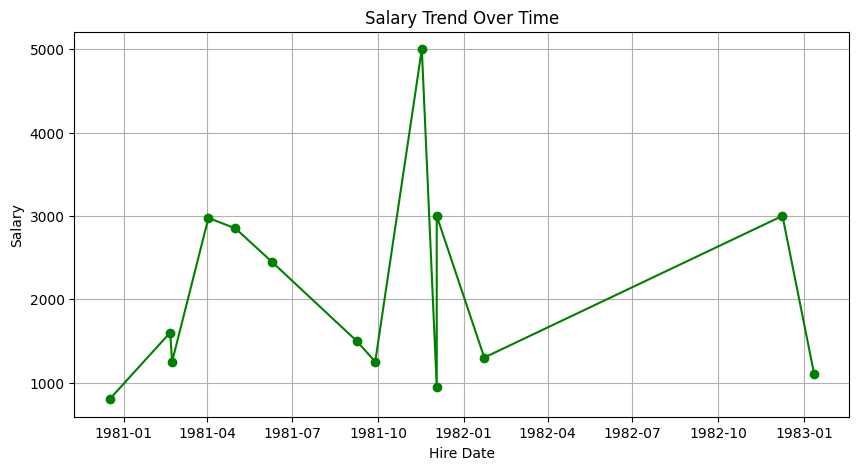

In [32]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])
df = df.sort_values('Hire_Date')

plt.figure(figsize = (10, 5))
plt.plot(df['Hire_Date'], df['Salary'],
         marker = 'o', linestyle = '-', color = 'Green')
plt.title('Salary Trend Over Time')
plt.xlabel('Hire Date')
plt.ylabel('Salary')
plt.grid(True)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_8664\2377108798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Job'], y = df['Salary'], palette = 'coolwarm')


Text(0, 0.5, 'Salary')

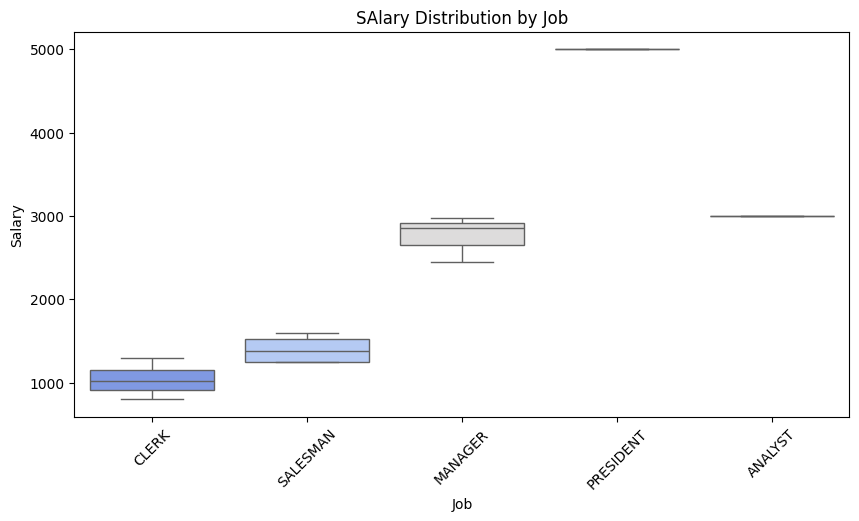

In [37]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = df['Job'], y = df['Salary'], palette = 'coolwarm')
plt.xticks(rotation = 45)
plt.title('SAlary Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Salary')